In [4]:
import rasterio
import numpy as np

with rasterio.open('/mnt/Nam/bairac/classification_data/landfill_training/05122019_0.tif') as src:
    data=src.read().astype('float32')
    out_meta=src.meta
    out_meta.update({'nodata': 0, 'dtype': 'float32', 'count': 1})

### Crop Condition ndvi = (band4 - band3)/(band4 + band3)
data1 = (data[3]-data[2])/(data[3]+data[2])
data1[np.isnan(data1)] = 0

### Chlorophyll Content ci = (band4 / band2) - 1
data2 = (data[3]/data[1])-1
data2[np.isnan(data2)] = 0

### Crop Age psri = (band3 - band2) / band4
data3 = (data[2]- data[1])/data[3]
data3[np.isnan(data3)] = 0

### Crop Density savi = 1.5*(band4 - band3)/(band4 + band3 + 0.5)
data4 = 1.5*(data[3]-data[2])/(data[3]+data[2]+0.5)
data4[np.isnan(data4)] = 0

### Crop Canopy evi = 2.5*(band4 - band3) / (band4 + (2.4 * band3) + 1)
data5 = 2.5*(data[3]-data[2])/(data[3]+(2.4*data[2])+1)
data5[np.isnan(data5)] = 0


/tmp/ipykernel_1749209/3161571321.py:10: RuntimeWarning: invalid value encountered in true_divide
  data1 = (data[3]-data[2])/(data[3]+data[2])
/tmp/ipykernel_1749209/3161571321.py:14: RuntimeWarning: divide by zero encountered in true_divide
  data2 = (data[3]/data[1])-1
/tmp/ipykernel_1749209/3161571321.py:14: RuntimeWarning: invalid value encountered in true_divide
  data2 = (data[3]/data[1])-1
/tmp/ipykernel_1749209/3161571321.py:18: RuntimeWarning: divide by zero encountered in true_divide
  data3 = (data[2]- data[1])/data[3]
/tmp/ipykernel_1749209/3161571321.py:18: RuntimeWarning: invalid value encountered in true_divide
  data3 = (data[2]- data[1])/data[3]


In [5]:
with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/Crop_Condition_ndvi.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data1.astype('float32'), 1)

with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/Chlorophyll_Content_ci.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data2.astype('float32'), 1)

with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/Crop_Age_psri.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data3.astype('float32'), 1)

with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/Crop_Density_savi.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data4.astype('float32'), 1)

with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/Crop_Canopy_evi.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data5.astype('float32'), 1)

In [6]:
import rasterio
import numpy as np

with rasterio.open('/mnt/Nam/public/bai_rac/05122019_0/Crop_Condition_ndvi.tif') as src:
    data=src.read()
    out_meta=src.meta
data[data>0.6]=5
data[data<=0]=1
data[np.logical_and(data>0, data<=0.2)]=2
data[np.logical_and(data>0.2, data<=0.4)]=3
data[np.logical_and(data>0.4, data<=0.6)]=4
out_meta.update({'dtype': 'uint8'})
with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/x-Crop_Condition_ndvi.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data.astype('uint8'))




with rasterio.open('/mnt/Nam/public/bai_rac/05122019_0/Chlorophyll_Content_ci.tif') as src:
    data=src.read()
    out_meta=src.meta
data[data>2.5]=6
data[data<=0]=1
data[np.logical_and(data>0, data<=1)]=2
data[np.logical_and(data>1, data<=1.5)]=3
data[np.logical_and(data>1.5, data<=2)]=4
data[np.logical_and(data>2, data<=2.5)]=5
out_meta.update({'dtype': 'uint8'})
with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/x-Chlorophyll_Content_ci.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data.astype('uint8'))



with rasterio.open('/mnt/Nam/public/bai_rac/05122019_0/Crop_Age_psri.tif') as src:
    data=src.read()
    out_meta=src.meta
data[data>-0.1]=3
data[data<=-0.12]=1
data[np.logical_and(data>-0.12, data<=-0.1)]=2
out_meta.update({'dtype': 'uint8'})
with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/x-Crop_Age_psri.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data.astype('uint8'))



with rasterio.open('/mnt/Nam/public/bai_rac/05122019_0/Crop_Density_savi.tif') as src:
    data=src.read()
    out_meta=src.meta
data[data>0.8]=6
data[data<=0]=1
data[np.logical_and(data>0, data<=0.2)]=2
data[np.logical_and(data>0.2, data<=0.4)]=3
data[np.logical_and(data>0.4, data<=0.6)]=4
data[np.logical_and(data>0.6, data<=0.8)]=5
out_meta.update({'dtype': 'uint8'})
with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/x-Crop_Density_savi.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data.astype('uint8'))



with rasterio.open('/mnt/Nam/public/bai_rac/05122019_0/Crop_Canopy_evi.tif') as src:
    data=src.read()
    out_meta=src.meta
data[data>1.1]=6
data[data<=0]=1
data[np.logical_and(data>0, data<=0.2)]=2
data[np.logical_and(data>0.2, data<=0.5)]=3
data[np.logical_and(data>0.5, data<=0.8)]=4
data[np.logical_and(data>0.8, data<=1.1)]=5
out_meta.update({'dtype': 'uint8'})
with rasterio.open("/mnt/Nam/public/bai_rac/05122019_0/x-Crop_Canopy_evi.tif", 'w', compress='RAW', **out_meta) as ras:
    ras.write(data.astype('uint8'))


In [2]:
import rasterio
import rasterio.mask
import glob
import numpy as np
import pandas as pd
import geopandas

geo_data = geopandas.read_file('/mnt/Nam/public/bai_rac/label.shp')
src1 = []
src2 = []
for i in range(len(geo_data)):
    if geo_data.iloc[i]['id'] == 1:
        src1.append(geo_data.iloc[i]['geometry'])
    else:
        src2.append(geo_data.iloc[i]['geometry'])

all_data= [[],[],[],[],[]]
# for path in glob.glob('/mnt/Nam/public/bai_rac/bai_rac/bai_rac/phanloai_bairac/*.tif'):
for path in glob.glob('/mnt/Nam/bairac/data/xxx/*.tif'):
    with rasterio.open(path) as src:
        height = src.height
        width = src.width
        src_transform = src.transform
        data = src.read()
    mask_paddy = rasterio.features.geometry_mask(src1, (height, width), src_transform,invert=True, all_touched=True).astype(np.uint16)
    mask_background = rasterio.features.geometry_mask(src2, (height, width), src_transform,invert=True, all_touched=True).astype(np.uint16)
    mask = mask_paddy+2*mask_background
    ggg = np.concatenate((data, mask[np.newaxis,...]))
    data = []
    for i in range(ggg.shape[0]):
        all_data[i].extend(list(ggg[i][ggg[-1]>0]))

# np.save('/mnt/Nam/tmp_Nam/pre-processing/data.npy', np.array(all_data).T)
df = pd.DataFrame(np.array(all_data).T, columns = ['ban1', 'ban2', 'ban3', 'ban4', 'label'])
print(df)
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('/mnt/Nam/tmp_Nam/pre-processing/data.csv')


           ban1      ban2      ban3      ban4  label
0      0.392045  0.358885  0.339775  0.483390    2.0
1      0.369318  0.405343  0.359098  0.555932    2.0
2      0.492898  0.443670  0.401771  0.593220    2.0
3      0.673295  0.498258  0.470209  0.559322    2.0
4      0.873580  0.672474  0.556361  0.503729    2.0
...         ...       ...       ...       ...    ...
19057  0.697906  0.526608  0.496594  0.382423    1.0
19058  0.636092  0.535345  0.487926  0.388836    1.0
19059  0.751745  0.524226  0.503406  0.406651    1.0
19060  0.796610  0.559174  0.531269  0.487173    1.0
19061  0.811565  0.606037  0.567802  0.530641    1.0

[19062 rows x 5 columns]


In [1]:
import rasterio
import rasterio.mask
import glob
import numpy as np
import pandas as pd
import geopandas


all_data= [[],[],[],[],[]]
for shp_path in glob.glob('/mnt/Nam/bairac/classification_data/landfill_training/*.shp'):
    path = shp_path.replace('.shp','.tif')
    print(path)
    with rasterio.open(path) as src:
        height = src.height
        width = src.width
        src_transform = src.transform
        data = src.read()
        projstr = src.crs.to_string()

    geo_data = geopandas.read_file(shp_path)
    geo_data = geo_data.to_crs(projstr)
    src1 = []
    src2 = []
    for i in range(len(geo_data)):
        if geo_data.iloc[i]['id'] == 1:
            src1.append(geo_data.iloc[i]['geometry'])
        else:
            src2.append(geo_data.iloc[i]['geometry'])

    mask_paddy = rasterio.features.geometry_mask(src1, (height, width), src_transform,invert=True, all_touched=True).astype(np.uint16)
    mask_background = rasterio.features.geometry_mask(src2, (height, width), src_transform,invert=True, all_touched=True).astype(np.uint16)
    mask = mask_paddy+2*mask_background
    ggg = np.concatenate((data, mask[np.newaxis,...]))

    for i in range(ggg.shape[0]):
        all_data[i].extend(list(ggg[i][ggg[-1]>0]))

# np.save('/mnt/Nam/tmp_Nam/pre-processing/data.npy', np.array(all_data).T)
df = pd.DataFrame(np.array(all_data).T, columns = ['ban1', 'ban2', 'ban3', 'ban4', 'label'])
print(df)
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('/mnt/Nam/tmp_Nam/pre-processing/data_new.csv')


/mnt/Nam/bairac/classification_data/05122019_0.tif
[0 1 2]
/mnt/Nam/bairac/classification_data/binh_duong.tif
[0 1 2]
/mnt/Nam/bairac/classification_data/05122021_0.tif
[0 1 2]
/mnt/Nam/bairac/classification_data/05122020_0.tif
[0 1 2]
       ban1  ban2  ban3  ban4  label
0       462   542   693  1736      2
1       421   591   791  1748      2
2       558   741   727  1192      2
3       608   787   937  1635      2
4       519   695  1312  2252      2
...     ...   ...   ...   ...    ...
41603   909  1032  1034  1171      1
41604   481   688   625  1932      1
41605   461   625   528  1942      1
41606   514   651   589  1818      1
41607   561   713   670  1771      1

[41608 rows x 5 columns]


In [ ]:
import cv2
vidcap = cv2.VideoCapture('/mnt/Nam/tmp_Nam/pre-processing/106681209-drone-thermal-night-vision-cam_H264HD1080.mov')
success,image = vidcap.read()
count = 0
success = True
while success:
    success,image = vidcap.read()
    if count %10==0:
        cv2.imwrite("/mnt/Nam/tmp_Nam/pre-processing/image/frame%d.jpg" % count, image)     # save frame as JPEG file
    if cv2.waitKey(10) == 27:                     # exit if Escape is hit
        break
    count += 1

In [ ]:
import rasterio
import numpy as np
import cv2
import copy

base_path=r"/mnt/data/remove_cloud/aaa0.tif"
image_path=r"/mnt/data/remove_cloud/aaa1.tif"


def get_quantile_schema(img):
    qt_scheme = []
    with rasterio.open(img) as r:
        num_band = r.count
        for chanel in range(1,num_band+1):
            data = r.read(chanel).astype(np.float16)
            data[data==0] = np.nan
            qt_scheme.append({
                'p2': np.nanpercentile(data, 2),
                'p98': np.nanpercentile(data, 98),
            })
    print(qt_scheme)
    return qt_scheme

def stretch_image(data,qt_scheme,mask,profile):
        ids = range(len(data))
        window_image = data
        cut_shape = np.shape(window_image)
        new_image = np.zeros((cut_shape[1], cut_shape[2], len(ids)), dtype=np.uint8)
        for i in ids:
            band = window_image[i]
            try:
                if profile['dtype'] == 'uint8':
                    cut_nor = band.astype(int)
                else:
                    band_qt = qt_scheme[i]
                    cut_nor = np.interp(band, (band_qt.get('p2'), band_qt.get('p98')), (1, 255)).astype(int)
            except Exception:
                cut_nor = band.astype(int)
            band[~mask[i]] = 0
            new_image[..., i] = cut_nor

        result = new_image/255.0
        return result, mask
    
with rasterio.open(base_path) as src1:
    img1 = src1.read()
    profile1 = src1.profile
    mask1 = src1.read_masks()
    transform1 = src1.transform
    w,h = src1.width, src1.height
    crs1 = src1.crs
with rasterio.open(image_path) as src2:
    img2 = src2.read()
    profile2 = src2.profile
    mask2 = src2.read_masks()
    
    
qt_scheme1 = get_quantile_schema(base_path)
qt_scheme2 = get_quantile_schema(image_path)
img1_streth,mask = stretch_image(img1,qt_scheme1,mask1,profile1)
img2_streth,mask = stretch_image(img2,qt_scheme2,mask2,profile2)
# img_change = (img1_streth - img2_streth)

image1 = copy.deepcopy(img1_streth[...,0])
image2 = copy.deepcopy(img2_streth[...,0])

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
 
def find_vector_set(diff_image, new_size):
    i = 0
    j = 0
    vector_set = np.zeros((int(new_size[0] * new_size[1] / 25), 25))
    while i < vector_set.shape[0]:
        while j < new_size[0]:
            k = 0
            while k < new_size[1]:
                block   = diff_image[j:j+5, k:k+5]
                feature = block.ravel()
                vector_set[i, :] = feature
                k = k + 5
            j = j + 5
        i = i + 1
 
    mean_vec   = np.mean(vector_set, axis = 0)
    vector_set = vector_set - mean_vec
    return vector_set, mean_vec
 
def find_FVS(EVS, diff_image, mean_vec, new):
    i = 2
    feature_vector_set = []
 
    while i < new[0] - 2:
        j = 2
        while j < new[1] - 2:
            block = diff_image[i-2:i+3, j-2:j+3]
            feature = block.flatten()
            feature_vector_set.append(feature)
            j = j+1
        i = i+1
 
    FVS = np.dot(feature_vector_set, EVS)
    FVS = FVS - mean_vec
    print("feature vector space size", FVS.shape)
    return FVS
 
def clustering(FVS, components, new):
    kmeans = KMeans(components, verbose = 0)
    kmeans.fit(FVS)
    output = kmeans.predict(FVS)
    count  = Counter(output)
 
    least_index = min(count, key = count.get)
    change_map  = np.reshape(output,(new[0] - 4, new[1] - 4))
    return least_index, change_map


In [6]:
new_size = np.asarray(image1.shape) / 5
new_size = new_size.astype(int) * 5

diff_image = abs(image1 - image2)

vector_set, mean_vec = find_vector_set(diff_image, new_size)
pca     = PCA()
pca.fit(vector_set)
EVS = pca.components_

FVS     = find_FVS(EVS, diff_image, mean_vec, new_size)
components = 3
least_index, change_map = clustering(FVS, components, new_size)

change_map[change_map == least_index] = 255
change_map[change_map != 255] = 0

change_map = change_map.astype(np.uint8)
kernel     = np.asarray(((0,0,1,0,0),
                        (0,1,1,1,0),
                        (1,1,1,1,1),
                        (0,1,1,1,0),
                        (0,0,1,0,0)), dtype=np.uint8)
cleanChangeMap = cv2.erode(change_map,kernel)

/home/skymap/anaconda3/envs/tf25x/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


feature vector space size (3325336, 25)


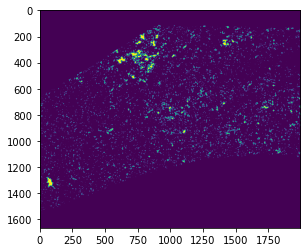

In [4]:
plt.imshow(cleanChangeMap)

In [5]:
outputFileName = r"/mnt/data/remove_cloud/xxx.tif"
new_dataset = rasterio.open(outputFileName, 'w', driver='GTiff',
                            height = h, width = w,
                            count=1, dtype="uint8",
                            crs=crs1,
                            transform=transform1,
                            compress='lzw',
                            nodata=0)

new_dataset.write(cleanChangeMap,1)
new_dataset.close()

In [ ]:
import os
import cv2
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops
ship_dir = '../input'
train_image_dir = os.path.join(ship_dir, 'train')
test_image_dir = os.path.join(ship_dir, 'test')

from skimage.morphology import label
def multi_rle_encode(img):
    labels = label(img[:, :, 0])
    return [rle_encode(labels==k) for k in np.unique(labels[labels>0])]

# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

def masks_as_image(in_mask_list, all_masks=None):
    # Take the individual ship masks and create a single mask array for all ships
    if all_masks is None:
        all_masks = np.zeros((768, 768), dtype = np.int16)
    #if isinstance(in_mask_list, list):
    for mask in in_mask_list:
        if isinstance(mask, str):
            all_masks += rle_decode(mask)
    return np.expand_dims(all_masks, -1)

masks = pd.read_csv(os.path.join('../input/',
                                 'train_ship_segmentations.csv'))
print(masks.shape[0], 'masks found')
print(masks['ImageId'].value_counts().shape[0])
masks.head()

In [1]:
import tqdm
import glob, os
import json, rasterio
import sys
import geopandas as gp
import numpy as np
from multiprocessing.pool import Pool
from functools import partial
import matplotlib.pyplot as plt
from tqdm import *
import copy
import cv2
import rasterio

a = json.load(open("/mnt/Nam/Buildinggg/data_train_v1/val/annotation.json"))

In [2]:
def annToMask(ann, height, width):
    """
    Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
    :return: binary mask (numpy 2D array)
    """
    segm = ann['segmentation']
    ignore_mask_color = 1
    a = np.array(segm).reshape(1,-1,2).astype(int)
    m = np.zeros((height,width), dtype=np.uint8)
    cv2.fillPoly(m, a, ignore_mask_color)
    return m

/mnt/Nam/Buildinggg/data_train_v1/val/images/Visalia_15t1_2018_NAD83_3_4_4326_2523.tif


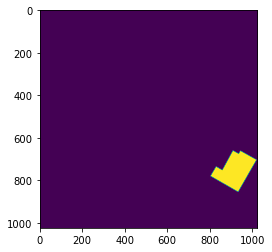

In [3]:
idx = 392
xxx = annToMask(a["annotations"][idx], a["annotations"][idx]["width"],a["annotations"][idx]["height"])
ggg = "/mnt/Nam/Buildinggg/data_train_v1/val/images/" + a["images"][a["annotations"][idx]["image_id"]-1]['file_name']
print(ggg)
with rasterio.open(ggg) as r:
    img = r.read().transpose(1,2,0)
plt.imshow(xxx)

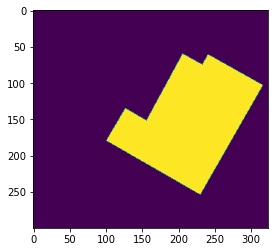

In [4]:
data = xxx[600:900, 700:]
img_0 = img[600:900, 700:]
plt.imshow(data)
datax= copy.deepcopy(data)

208.56158447265625 141.07208251953125 149.40670776367188 173.69552612304688 1 60.164459228515625



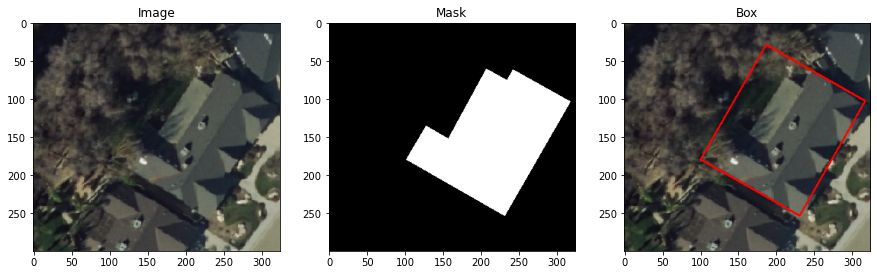

In [5]:
plotme = 1
if plotme == 1:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
img_1 = img_0.copy()

cnts, hierarchy = cv2.findContours((255*datax).astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.minAreaRect(cnts[0])
if rect[1][1]>rect[1][0]:
    angle = 90-rect[2]
else:
    angle = -rect[2]
box = cv2.boxPoints(rect)
#print(box)
box = np.int0(box)

if plotme == 1:
    cv2.drawContours(img_1,[box],0,(255,0,0),2)
x = int(rect[0][0])
y = int(rect[0][1])

print(str(rect[0][0]) + ' ' + str(rect[0][1]) + ' ' + str(rect[1][0]) + ' ' + str(rect[1][1]) + ' ' + '1' + ' ' + str(angle) + '\n' )

if plotme == 1:
    ax1.imshow(img_0)
    ax1.set_title('Image')
    ax2.set_title('Mask')
    ax3.set_title('Box')
    ax2.imshow(datax, cmap='gray')
    ax3.imshow(img_1)
    plt.show()

In [1]:
import rasterio
import geopandas
from shapely.geometry import box

# with rasterio.open("/mnt/Nam/Buildinggg/data_train_v1/train/images/varsaivira_4266.tif") as r:
#     src_transform = r.transform

gdf = geopandas.read_file("/mnt/Nam/public/MaxarARD/building_3band_maxar_img_03m_and_05m20220309T1607/New folder/2ee9c3237ebe47d0bf06e81ab9789505.shp")
# gdf = gdf['geometry'].apply(lambda x: box(*x.bounds))

def convert(x):
    g = box(*x.buffer(2, cap_style=3).bounds)
    return g

gdf = gdf['geometry'].apply(convert)

xxx = geopandas.GeoDataFrame(gdf, geometry='geometry', crs='EPSG:3857')
xxx.to_file("/mnt/Nam/public/MaxarARD/building_3band_maxar_img_03m_and_05m20220309T1607/New folder/box_2ee9c3237ebe47d0bf06e81ab9789505.shp")